In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
# Подготавливаем общие настройки для графиков

sns.set(
    rc={
        "figure.figsize": (20, 10), #размер графика - 12 дюймов в ширину, 8 в длину
        "axes.titlesize": 20, #размер заголовка 
        "axes.labelsize": 14, #размер подписей осей
        "xtick.labelsize": 13, #размер подписей чёрточек на x-оси
        "ytick.labelsize": 13, #размер подписей чёрточек на y-оси
    }
)

sns.set_style("whitegrid") #тема фона, белая со штриховкой
sns.set(font_scale=2)

In [3]:
os.getcwd()

'/Users/evgeniyburovik/Documents/Courses/les_7'

In [4]:
os.listdir(os.getcwd())

['step_1_lesson_7.csv',
 'ls_7_hw_1.ipynb',
 'les_7_hw_2.ipynb',
 'lesson_7.ipynb',
 '7_browser.csv',
 'step_2_lesson_7.csv',
 'tables.xlsx',
 'step_3_lesson_7.csv',
 'step_4_lesson_7.csv',
 'sample_ads.csv',
 '.ipynb_checkpoints',
 'ads_data.csv.zip']

## Задание 1

In [5]:
df_1 = pd.read_csv('/Users/evgeniyburovik/Documents/Courses/les_7/step_1_lesson_7.csv')

In [6]:
df_1

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


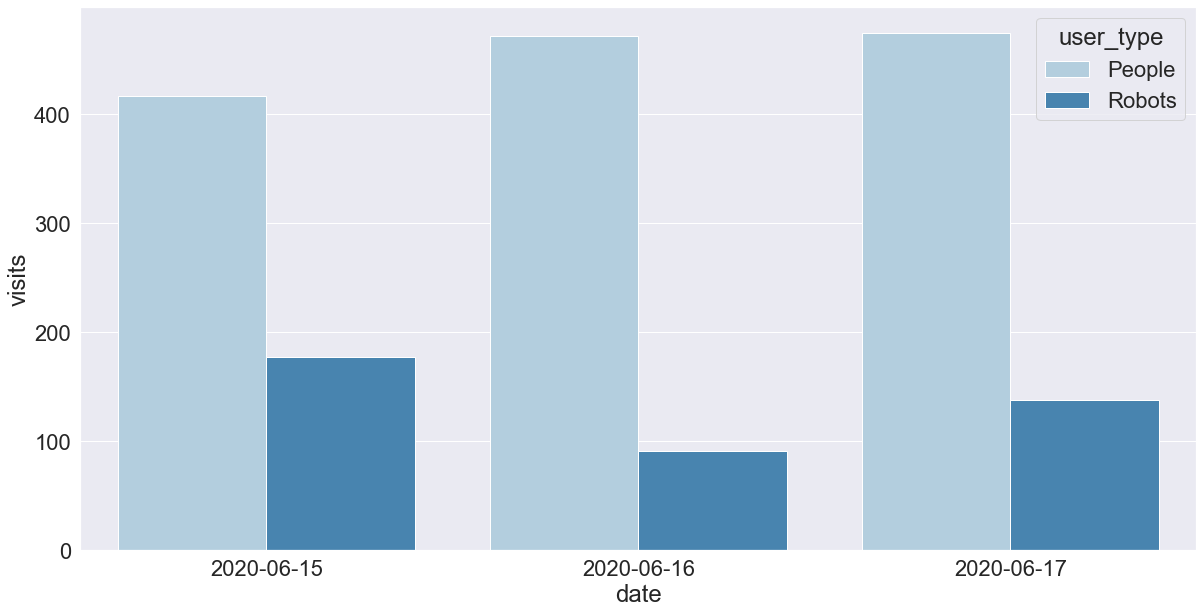

In [7]:
ax = sns.barplot(x="date", y="visits", data=df_1, hue="user_type", palette="Blues")

In [1]:
import pandas as pd
import requests
import json


# Base url to service
base_url = 'https://api-metrika.yandex.net/stat/v1/data?'

# Get json of response
query = requests.get(base_url,
             params={
             'metrics': 'ym:s:visits',
             'dimensions': 'ym:s:date',
             'id': 44147844
             })

json_data = json.loads(query.text)

# Conversion of obtained json to dataframe
visits_data = pd.DataFrame([(
                             i['dimensions'][0]['name'],
                             i['metrics'][0]) for i in json_data['data']], 
                           columns=['date', 'visits'])

In [7]:
json_data['data']

[{'dimensions': [{'name': '2021-09-14'}], 'metrics': [510.0]},
 {'dimensions': [{'name': '2021-09-13'}], 'metrics': [506.0]},
 {'dimensions': [{'name': '2021-09-09'}], 'metrics': [479.0]},
 {'dimensions': [{'name': '2021-09-10'}], 'metrics': [419.0]},
 {'dimensions': [{'name': '2021-09-11'}], 'metrics': [312.0]},
 {'dimensions': [{'name': '2021-09-12'}], 'metrics': [309.0]},
 {'dimensions': [{'name': '2021-09-15'}], 'metrics': [101.0]}]

In [10]:
querys = requests.get(base_url,
             params={
             'metrics': 'ym:s:visits',
             'dimensions': 'ym:s:date',
             'id': 44147844
             })
print(querys)

<Response [200]>


In [11]:
visits_data

,date,visits
0,2021-07-26,459.0
1,2021-07-27,429.0
2,2021-07-28,420.0
3,2021-07-23,406.0
4,2021-07-25,270.0
5,2021-07-24,265.0
6,2021-07-29,130.0


In [12]:
visits_robot_day = "metrics=ym:s:visits&dimensions=ym:s:date&filters=ym:s:date=='2021-07-12'&id=44147844"
url = base_url + visits_robot_day
query = requests.get(url)
json_data = json.loads(query.text)
print(json_data['data'])

visits_robot_day_data = pd.DataFrame([(
                             i['dimensions'][0]['name'],
                             i['metrics'][0]) for i in json_data['data']], 
                           columns=['date', 'visits'])
visits_robot_day_data

[]


,date,visits


In [13]:
# Base url to service
base_url = 'https://api-metrika.yandex.net/stat/v1/data/bytime?'

# &-separated parameters of query in a form of name=value, taken from the metrica site
visits = "date1=2021-07-04&date2=2021-07-12&group=day&dimensions=ym:s:<attribution>TrafficSource&attribution=last&ids=44147844&metrics=ym:s:visits"
url = base_url + visits

# Get json of response
query = requests.get(url)
json_data = json.loads(query.text)

# Conversion of obtained json to dataframe
json_data['data']

[{'dimensions': [{'icon_id': '2',
    'icon_type': 'traffic-source',
    'name': 'Search engine traffic',
    'id': 'organic'}],
  'metrics': [[81.0, 180.0, 168.0, 158.0, 176.0, 142.0, 57.0, 79.0, 167.0]]},
 {'dimensions': [{'icon_id': '0',
    'icon_type': 'traffic-source',
    'name': 'Direct traffic',
    'id': 'direct'}],
  'metrics': [[77.0, 118.0, 127.0, 118.0, 142.0, 110.0, 58.0, 67.0, 120.0]]},
 {'dimensions': [{'icon_id': '1',
    'icon_type': 'traffic-source',
    'name': 'Link traffic',
    'id': 'referral'}],
  'metrics': [[66.0, 138.0, 112.0, 101.0, 109.0, 76.0, 59.0, 64.0, 113.0]]},
 {'dimensions': [{'icon_id': '3',
    'icon_type': 'traffic-source',
    'name': 'Ad traffic',
    'id': 'ad'}],
  'metrics': [[6.0, 19.0, 77.0, 84.0, 87.0, 89.0, 71.0, 79.0, 70.0]]},
 {'dimensions': [{'icon_id': '-1',
    'icon_type': 'traffic-source',
    'name': 'Internal traffic',
    'id': 'internal'}],
  'metrics': [[4.0, 10.0, 10.0, 13.0, 7.0, 8.0, 4.0, 12.0, 8.0]]},
 {'dimensions': [{'

In [14]:
metrica_df = pd.DataFrame([(
            i['dimensions'][0]['icon_id'],
            i['dimensions'][0]['name'],
            i['dimensions'][0]['id'],
            i['metrics'][0]) for i in json_data['data']],
            columns=['icon_id', 'name', 'id', 'visits'])

In [15]:
metrica_df

,icon_id,name,id,visits
0,2,Search engine traffic,organic,"[81.0, 180.0, 168.0, 158.0, 176.0, 142.0, 57.0..."
1,0,Direct traffic,direct,"[77.0, 118.0, 127.0, 118.0, 142.0, 110.0, 58.0..."
2,1,Link traffic,referral,"[66.0, 138.0, 112.0, 101.0, 109.0, 76.0, 59.0,..."
3,3,Ad traffic,ad,"[6.0, 19.0, 77.0, 84.0, 87.0, 89.0, 71.0, 79.0..."
4,-1,Internal traffic,internal,"[4.0, 10.0, 10.0, 13.0, 7.0, 8.0, 4.0, 12.0, 8.0]"
5,8,Social network traffic,social,"[2.0, 0.0, 1.0, 4.0, 1.0, 3.0, 8.0, 4.0, 4.0]"
6,7,Mailing traffic,email,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0]"


In [16]:
# Взрываетм дата-сет и выносим список в строки
metrica_df.explode('visits').reset_index()

,index,icon_id,name,id,visits
0,0,2,Search engine traffic,organic,81.0
1,0,2,Search engine traffic,organic,180.0
2,0,2,Search engine traffic,organic,168.0
3,0,2,Search engine traffic,organic,158.0
4,0,2,Search engine traffic,organic,176.0
...,...,...,...,...,...
58,6,7,Mailing traffic,email,0.0
59,6,7,Mailing traffic,email,2.0
60,6,7,Mailing traffic,email,0.0
61,6,7,Mailing traffic,email,0.0


## Задание 2

In [17]:
df_2 = pd.read_csv('/Users/evgeniyburovik/Documents/Courses/les_7/step_2_lesson_7.csv')
df_2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [18]:
df_2.browser.nunique()

15

In [19]:
df_2.shape

(15, 3)

In [20]:
df_2.visits.sum()

594.0

In [21]:
df_2.query('browser == "Google Chrome"').visits[0]

354.0

In [22]:
round(354*100/594)

60

## Задание 3

In [23]:
df_3 = pd.read_csv('/Users/evgeniyburovik/Documents/Courses/les_7/step_3_lesson_7.csv')
df_3

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [24]:
df_3.visits.sum()

594.0

In [25]:
df_3['score_vizits_procent'] = round(df_3.visits*100/df_3.visits.sum(),2)

In [26]:
df_3[df_3['user_type'] == 'Robots']

,date,browser,user_type,visits,score_vizits_procent
1,2020-06-15,Google Chrome,Robots,104.0,17.51
3,2020-06-15,Firefox,Robots,31.0,5.22
6,2020-06-15,Safari,Robots,22.0,3.70
11,2020-06-15,Yandex Browser,Robots,7.0,1.18
12,2020-06-15,Opera,Robots,5.0,0.84
13,2020-06-15,UCWEB,Robots,4.0,0.67
15,2020-06-15,Mobile Safari,Robots,1.0,0.17
18,2020-06-15,Chromium,Robots,1.0,0.17
21,2020-06-15,Edge,Robots,1.0,0.17
23,2020-06-15,Samsung Internet,Robots,1.0,0.17


In [27]:
robots_vizit = df_3.query('user_type == "Robots"')\
                    .groupby('browser', as_index=False)\
                    .agg({'visits':'sum'})
robots_vizit

,browser,visits
0,Chromium,1.0
1,Edge,1.0
2,Firefox,31.0
3,Google Chrome,104.0
4,Mobile Safari,1.0
5,Opera,5.0
6,Safari,22.0
7,Samsung Internet,1.0
8,UCWEB,4.0
9,Yandex Browser,7.0


In [28]:
robots_vizit['score_vizits_procent'] = (robots_vizit.visits * 100) / robots_vizit.visits.sum()

In [29]:
robots_vizit['score_vizits_procent'] = robots_vizit.score_vizits_procent.round(2)

In [30]:
robots_vizit.sort_values('score_vizits_procent', ascending=False)

,browser,visits,score_vizits_procent
3,Google Chrome,104.0,58.76
2,Firefox,31.0,17.51
6,Safari,22.0,12.43
9,Yandex Browser,7.0,3.95
5,Opera,5.0,2.82
8,UCWEB,4.0,2.26
0,Chromium,1.0,0.56
1,Edge,1.0,0.56
4,Mobile Safari,1.0,0.56
7,Samsung Internet,1.0,0.56


## Задание 4

In [31]:
df_4 = pd.read_csv('/Users/evgeniyburovik/Documents/Courses/les_7/step_4_lesson_7.csv')
df_4

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [32]:
df_4.visits.sum()
df_4['percentage_of_visits'] = round(df_4.visits/df_4.visits.sum()*100,1)
df_4

,date,browser,user_type,visits,percentage_of_visits
0,2020-06-15,Google Chrome,People,250.0,42.1
1,2020-06-15,Google Chrome,Robots,104.0,17.5
2,2020-06-15,Yandex Browser,People,47.0,7.9
3,2020-06-15,Firefox,Robots,31.0,5.2
4,2020-06-15,Chrome Mobile,People,31.0,5.2
5,2020-06-15,Firefox,People,27.0,4.5
6,2020-06-15,Safari,Robots,22.0,3.7
7,2020-06-15,Safari,People,19.0,3.2
8,2020-06-15,Mobile Safari,People,15.0,2.5
9,2020-06-15,Opera,People,11.0,1.9


In [39]:
# Base url to service ym:pv:browser
base_url = 'https://api-metrika.yandex.net/stat/v1/data?'

# &-separated parameters of query in a form of name=value, taken from the metrica site
visits = "metrics=ym:s:visits&dimensions=ym:s:date&filters=ym:s:date=='2021-07-27'&dimensions=ym:s:isRobot&dimensions=ym:s:browser&id=44147844"
url = base_url + visits

# Get json of response
query = requests.get(url)
json_data = json.loads(query.text)

json_data['data']

[{'dimensions': [{'name': '2021-07-27'},
   {'name': 'People', 'id': 'no'},
   {'icon_id': '6',
    'icon_type': 'browser',
    'name': 'Google Chrome',
    'id': '6'}],
  'metrics': [158.0]},
 {'dimensions': [{'name': '2021-07-27'},
   {'name': 'Robots', 'id': 'yes'},
   {'icon_id': '6',
    'icon_type': 'browser',
    'name': 'Google Chrome',
    'id': '6'}],
  'metrics': [126.0]},
 {'dimensions': [{'name': '2021-07-27'},
   {'name': 'People', 'id': 'no'},
   {'icon_id': '83',
    'icon_type': 'browser',
    'name': 'Chrome Mobile',
    'id': '83'}],
  'metrics': [30.0]},
 {'dimensions': [{'name': '2021-07-27'},
   {'name': 'People', 'id': 'no'},
   {'icon_id': '70',
    'icon_type': 'browser',
    'name': 'Yandex Browser',
    'id': '70'}],
  'metrics': [28.0]},
 {'dimensions': [{'name': '2021-07-27'},
   {'name': 'People', 'id': 'no'},
   {'icon_id': '4', 'icon_type': 'browser', 'name': 'Safari', 'id': '4'}],
  'metrics': [16.0]},
 {'dimensions': [{'name': '2021-07-27'},
   {'name'

In [40]:
pd.DataFrame([(
            i['dimensions'][0]['name'],
            i['dimensions'][1]['name'],
            i['dimensions'][2]['name'],
            i['metrics'][0]) for i in json_data['data']], 
            columns=['date','user_type','browser' ,'visits'])

,date,user_type,browser,visits
0,2021-07-27,People,Google Chrome,158.0
1,2021-07-27,Robots,Google Chrome,126.0
2,2021-07-27,People,Chrome Mobile,30.0
3,2021-07-27,People,Yandex Browser,28.0
4,2021-07-27,People,Safari,16.0
5,2021-07-27,Robots,Edge,13.0
6,2021-07-27,People,Firefox,11.0
7,2021-07-27,Robots,Firefox,11.0
8,2021-07-27,People,Mobile Safari,10.0
9,2021-07-27,Robots,Opera,4.0


In [35]:
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

In [36]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']


my_mail = 'evg.burovik@gmail.com'
path_to_credentials = '/Users/evgeniyburovik/Desktop/spreadsheets-319706-751ebb8ad26e.json'# Authorization
credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credentials, scope)
gs = gspread.authorize(credentials)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/evgeniyburovik/Desktop/spreadsheets-319706-751ebb8ad26e.json'

In [ ]:
# Name of the table in google sheets,# can be url for open_by_url# or id (key) part for open_by_key
table_name = 'spread_test'  # Your table# Get this table
work_sheet = gs.open(table_name)

# Select 1st sheet
sheet1 = work_sheet.sheet1

# Get data in python lists format
data = sheet1.get_all_values()

# Get header from data
headers = data.pop(0)

# Create df
df = pd.DataFrame(data, columns=headers)
df.head()

In [ ]:
# Create empty table
table_name = 'A new spreadsheet'

sheet = gs.create(table_name)


# Make it visible to other guys
sheet.share(my_mail, perm_type='user', role='writer')

In [ ]:
# Create your df
df = df_4

# Looks like spreadsheet should be already present at the dist (so, run code in create table section)
sheet = 'Master'
d2g.upload(df, table_name, sheet, credentials=credentials, row_names=True)

## Задание 7

In [ ]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df_5 = pd.read_csv(BytesIO(data))



In [ ]:
df_4 = df_4.drop(columns='percentage_of_visits')

In [ ]:
df_6 = df_5.merge(df_4, on = ['date', 'browser', 'user_type'])

In [ ]:
df_6['visits_users'] = df_6.visits / df_6.users

In [ ]:
#df_6.visits_users = df_6.visits_users.round()

In [ ]:
df_6